# 01-Lab_18-07-2025

## Data Visualization

### DataSet Used :- Cars Dataset

#### Setup Section

In [1]:
pip install pandas numpy matplotlib seaborn scipy

^C
Note: you may need to restart the kernel to use updated packages.


  Using cached matplotlib-3.10.5-cp313-cp313-win_amd64.whl.metadata (11 kB)
  Using cached seaborn-0.13.2-py3-none-any.whl.metadata (5.4 kB)
  Using cached contourpy-1.3.3-cp313-cp313-win_amd64.whl.metadata (5.5 kB)
Using cached matplotlib-3.10.5-cp313-cp313-win_amd64.whl (8.1 MB)
Using cached seaborn-0.13.2-py3-none-any.whl (294 kB)
Using cached contourpy-1.3.3-cp313-cp313-win_amd64.whl (226 kB)

   ---------------------------------------- 0/3 [contourpy]
   ---------------------------------------- 0/3 [contourpy]
   ------------- -------------------------- 1/3 [matplotlib]
   ------------- -------------------------- 1/3 [matplotlib]
   ------------- -------------------------- 1/3 [matplotlib]
   ------------- -------------------------- 1/3 [matplotlib]
   ------------- -------------------------- 1/3 [matplotlib]
   ------------- -------------------------- 1/3 [matplotlib]
   ------------- -------------------------- 1/3 [matplotlib]
   ------------- -------------------------- 1/3 [mat


[notice] A new release of pip is available: 25.1.1 -> 25.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [2]:
# 1. Setup
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

%matplotlib inline

sns.set_theme(style="whitegrid", font_scale=1.1)

#### Usage Of CSV Dataset

In [3]:
cars = pd.read_csv('Dataset/cars.csv') 
print("Cars Dataset loaded — shape:", cars.shape)
display(cars.head())
print(cars.head())
print(cars.describe())
print(cars.isnull().sum())

Cars Dataset loaded — shape: (1276, 140)


,Make,Model,Variant,Ex-Showroom_Price,Displacement,Cylinders,Valves_Per_Cylinder,Drivetrain,Cylinder_Configuration,Emission_Norm,...,Leather_Wrapped_Steering,Automatic_Headlamps,Engine_Type,ASR_/_Traction_Control,Cruise_Control,USB_Ports,Heads-Up_Display,Welcome_Lights,Battery,Electric_Range
0,Tata,Nano Genx,Xt,"Rs. 2,92,667",624 cc,2.0,2.0,RWD (Rear Wheel Drive),In-line,BS IV,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Tata,Nano Genx,Xe,"Rs. 2,36,447",624 cc,2.0,2.0,RWD (Rear Wheel Drive),In-line,BS IV,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Tata,Nano Genx,Emax Xm,"Rs. 2,96,661",624 cc,2.0,2.0,RWD (Rear Wheel Drive),In-line,BS IV,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Tata,Nano Genx,Xta,"Rs. 3,34,768",624 cc,2.0,2.0,RWD (Rear Wheel Drive),In-line,BS IV,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Tata,Nano Genx,Xm,"Rs. 2,72,223",624 cc,2.0,2.0,RWD (Rear Wheel Drive),In-line,BS IV,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


   Make      Model  Variant Ex-Showroom_Price Displacement  Cylinders  \
0  Tata  Nano Genx       Xt      Rs. 2,92,667       624 cc        2.0   
1  Tata  Nano Genx       Xe      Rs. 2,36,447       624 cc        2.0   
2  Tata  Nano Genx  Emax Xm      Rs. 2,96,661       624 cc        2.0   
3  Tata  Nano Genx      Xta      Rs. 3,34,768       624 cc        2.0   
4  Tata  Nano Genx       Xm      Rs. 2,72,223       624 cc        2.0   

   Valves_Per_Cylinder              Drivetrain Cylinder_Configuration  \
0                  2.0  RWD (Rear Wheel Drive)                In-line   
1                  2.0  RWD (Rear Wheel Drive)                In-line   
2                  2.0  RWD (Rear Wheel Drive)                In-line   
3                  2.0  RWD (Rear Wheel Drive)                In-line   
4                  2.0  RWD (Rear Wheel Drive)                In-line   

  Emission_Norm  ... Leather_Wrapped_Steering Automatic_Headlamps Engine_Type  \
0         BS IV  ...                     

#### Data Cleaning & Preprocessing

In [4]:
# 1.1 Clean price: strip “Rs.”, commas → numeric
cars['Price'] = (
    cars['Ex-Showroom_Price']
      .str.replace(r'[^0-9]', '', regex=True)
      .astype(float)
)

# 1.2 Clean displacement: strip “ cc” → numeric
cars['Displacement'] = (
    cars['Displacement']
      .str.replace(' cc', '', regex=False)
      .astype(float)
)

# 1.3 Quick sanity checks
print("\n--- After Cleaning ---")
print(cars[['Price','Displacement']].describe())
print("\nMissing values in Price & Displacement:")
print(cars[['Price','Displacement']].isnull().sum())

# Numeric features for “pairplot” & “heatmap”
numeric_cols = ['Cylinders','Valves_Per_Cylinder','Doors',
                'Seating_Capacity','Number_of_Airbags',
                'USB_Ports','Price','Displacement']

# Categorical features with 2–10 unique values for grouping
categorical_cols = [
    'Drivetrain',
    'Emission_Norm',
    'Cylinder_Configuration'
]
print("Numeric:", numeric_cols)
print("Categorical:", categorical_cols)



--- After Cleaning ---
              Price  Displacement
count  1.276000e+03   1264.000000
mean   4.596538e+06   1858.804589
std    1.214735e+07   1063.152389
min    2.364470e+05     72.000000
25%    7.438760e+05   1198.000000
50%    1.060064e+06   1497.000000
75%    2.979828e+06   1998.000000
max    2.121554e+08   7993.000000

Missing values in Price & Displacement:
Price            0
Displacement    12
dtype: int64
Numeric: ['Cylinders', 'Valves_Per_Cylinder', 'Doors', 'Seating_Capacity', 'Number_of_Airbags', 'USB_Ports', 'Price', 'Displacement']
Categorical: ['Drivetrain', 'Emission_Norm', 'Cylinder_Configuration']


#### Bar Chart

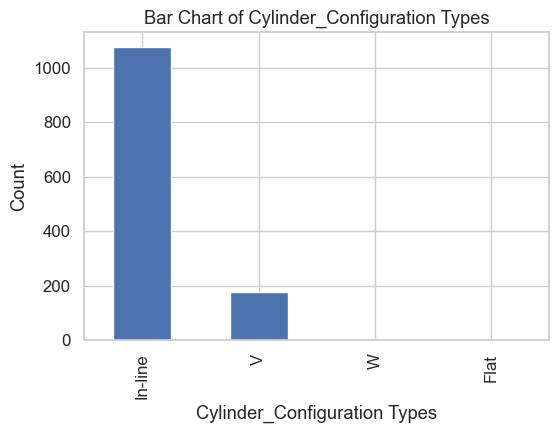

In [6]:
# --- 1. Bar Chart: Counts of a categorical column (e.g., 'fuelType')
plt.figure(figsize=(6,4))
cars['Cylinder_Configuration'].value_counts().plot(kind='bar')
plt.title('Bar Chart of Cylinder_Configuration Types')
plt.xlabel('Cylinder_Configuration Types')
plt.ylabel('Count')
plt.show()

#### Line Chart

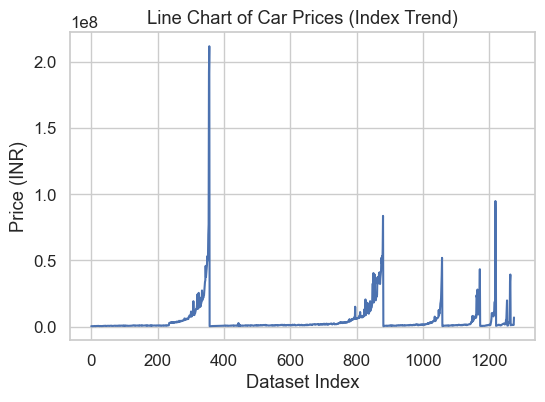

In [7]:
# 2. Line Chart: Price over Index (trend)
plt.figure(figsize=(6,4))
plt.plot(cars.index, cars['Price'], linewidth=1.5)
plt.title('Line Chart of Car Prices (Index Trend)')
plt.xlabel('Dataset Index')
plt.ylabel('Price (INR)')
plt.show()

#### Histogram

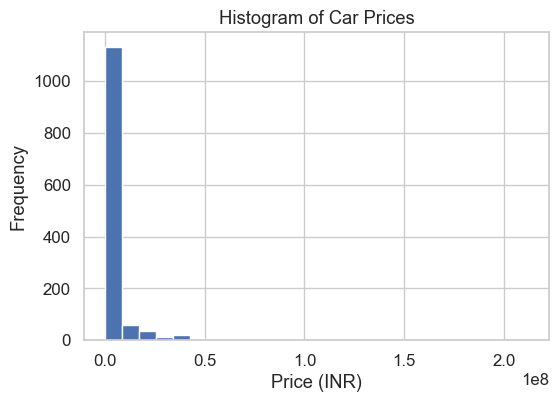

In [8]:
# 3. Histogram: Price distribution
plt.figure(figsize=(6,4))
plt.hist(cars['Price'], bins=25)
plt.title('Histogram of Car Prices')
plt.xlabel('Price (INR)')
plt.ylabel('Frequency')
plt.show()

#### Box Plot

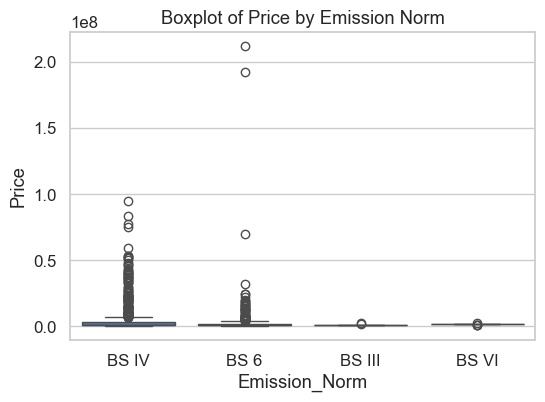

In [9]:
# 4. Boxplot: Price by Emission Norm
plt.figure(figsize=(6,4))
sns.boxplot(x='Emission_Norm', y='Price', data=cars)
plt.title('Boxplot of Price by Emission Norm')
plt.show()

#### Violin Plot

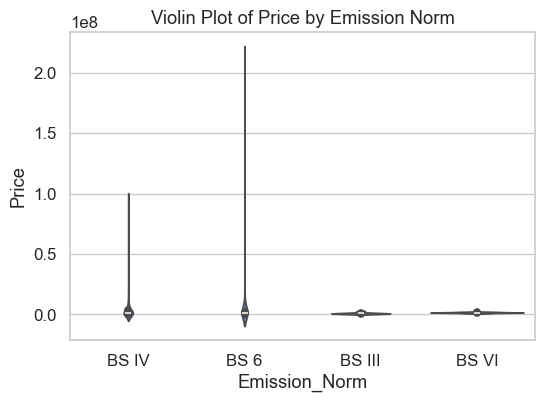

In [10]:
# 5. Violin Plot: Price by Emission Norm
plt.figure(figsize=(6,4))
sns.violinplot(x='Emission_Norm', y='Price', data=cars)
plt.title('Violin Plot of Price by Emission Norm')
plt.show()

#### Scatter Plot

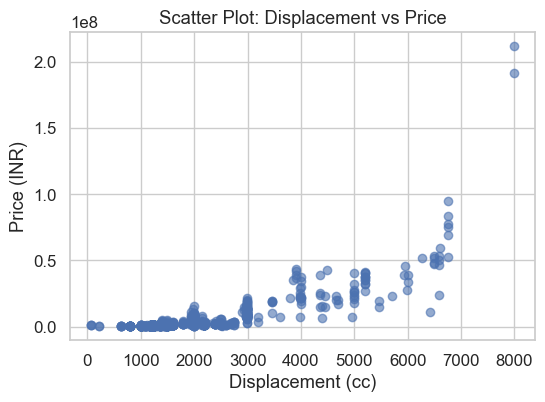

In [11]:
# 6. Scatter Plot: Displacement vs Price
plt.figure(figsize=(6,4))
plt.scatter(cars['Displacement'], cars['Price'], alpha=0.6)
plt.xlabel('Displacement (cc)')
plt.ylabel('Price (INR)')
plt.title('Scatter Plot: Displacement vs Price')
plt.show()

#### KDE Plot

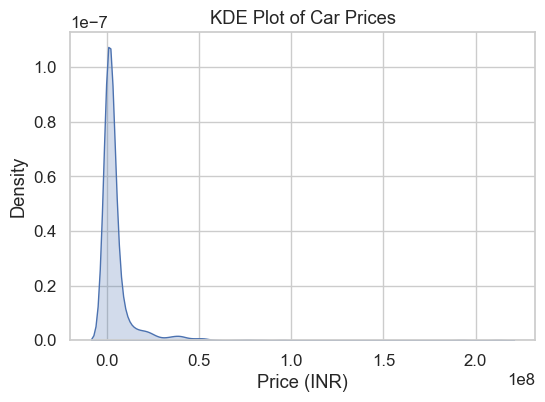

In [12]:
# 7. KDE Plot: Price density
plt.figure(figsize=(6,4))
sns.kdeplot(cars['Price'], fill=True)
plt.title('KDE Plot of Car Prices')
plt.xlabel('Price (INR)')
plt.show()

#### Pair Plot

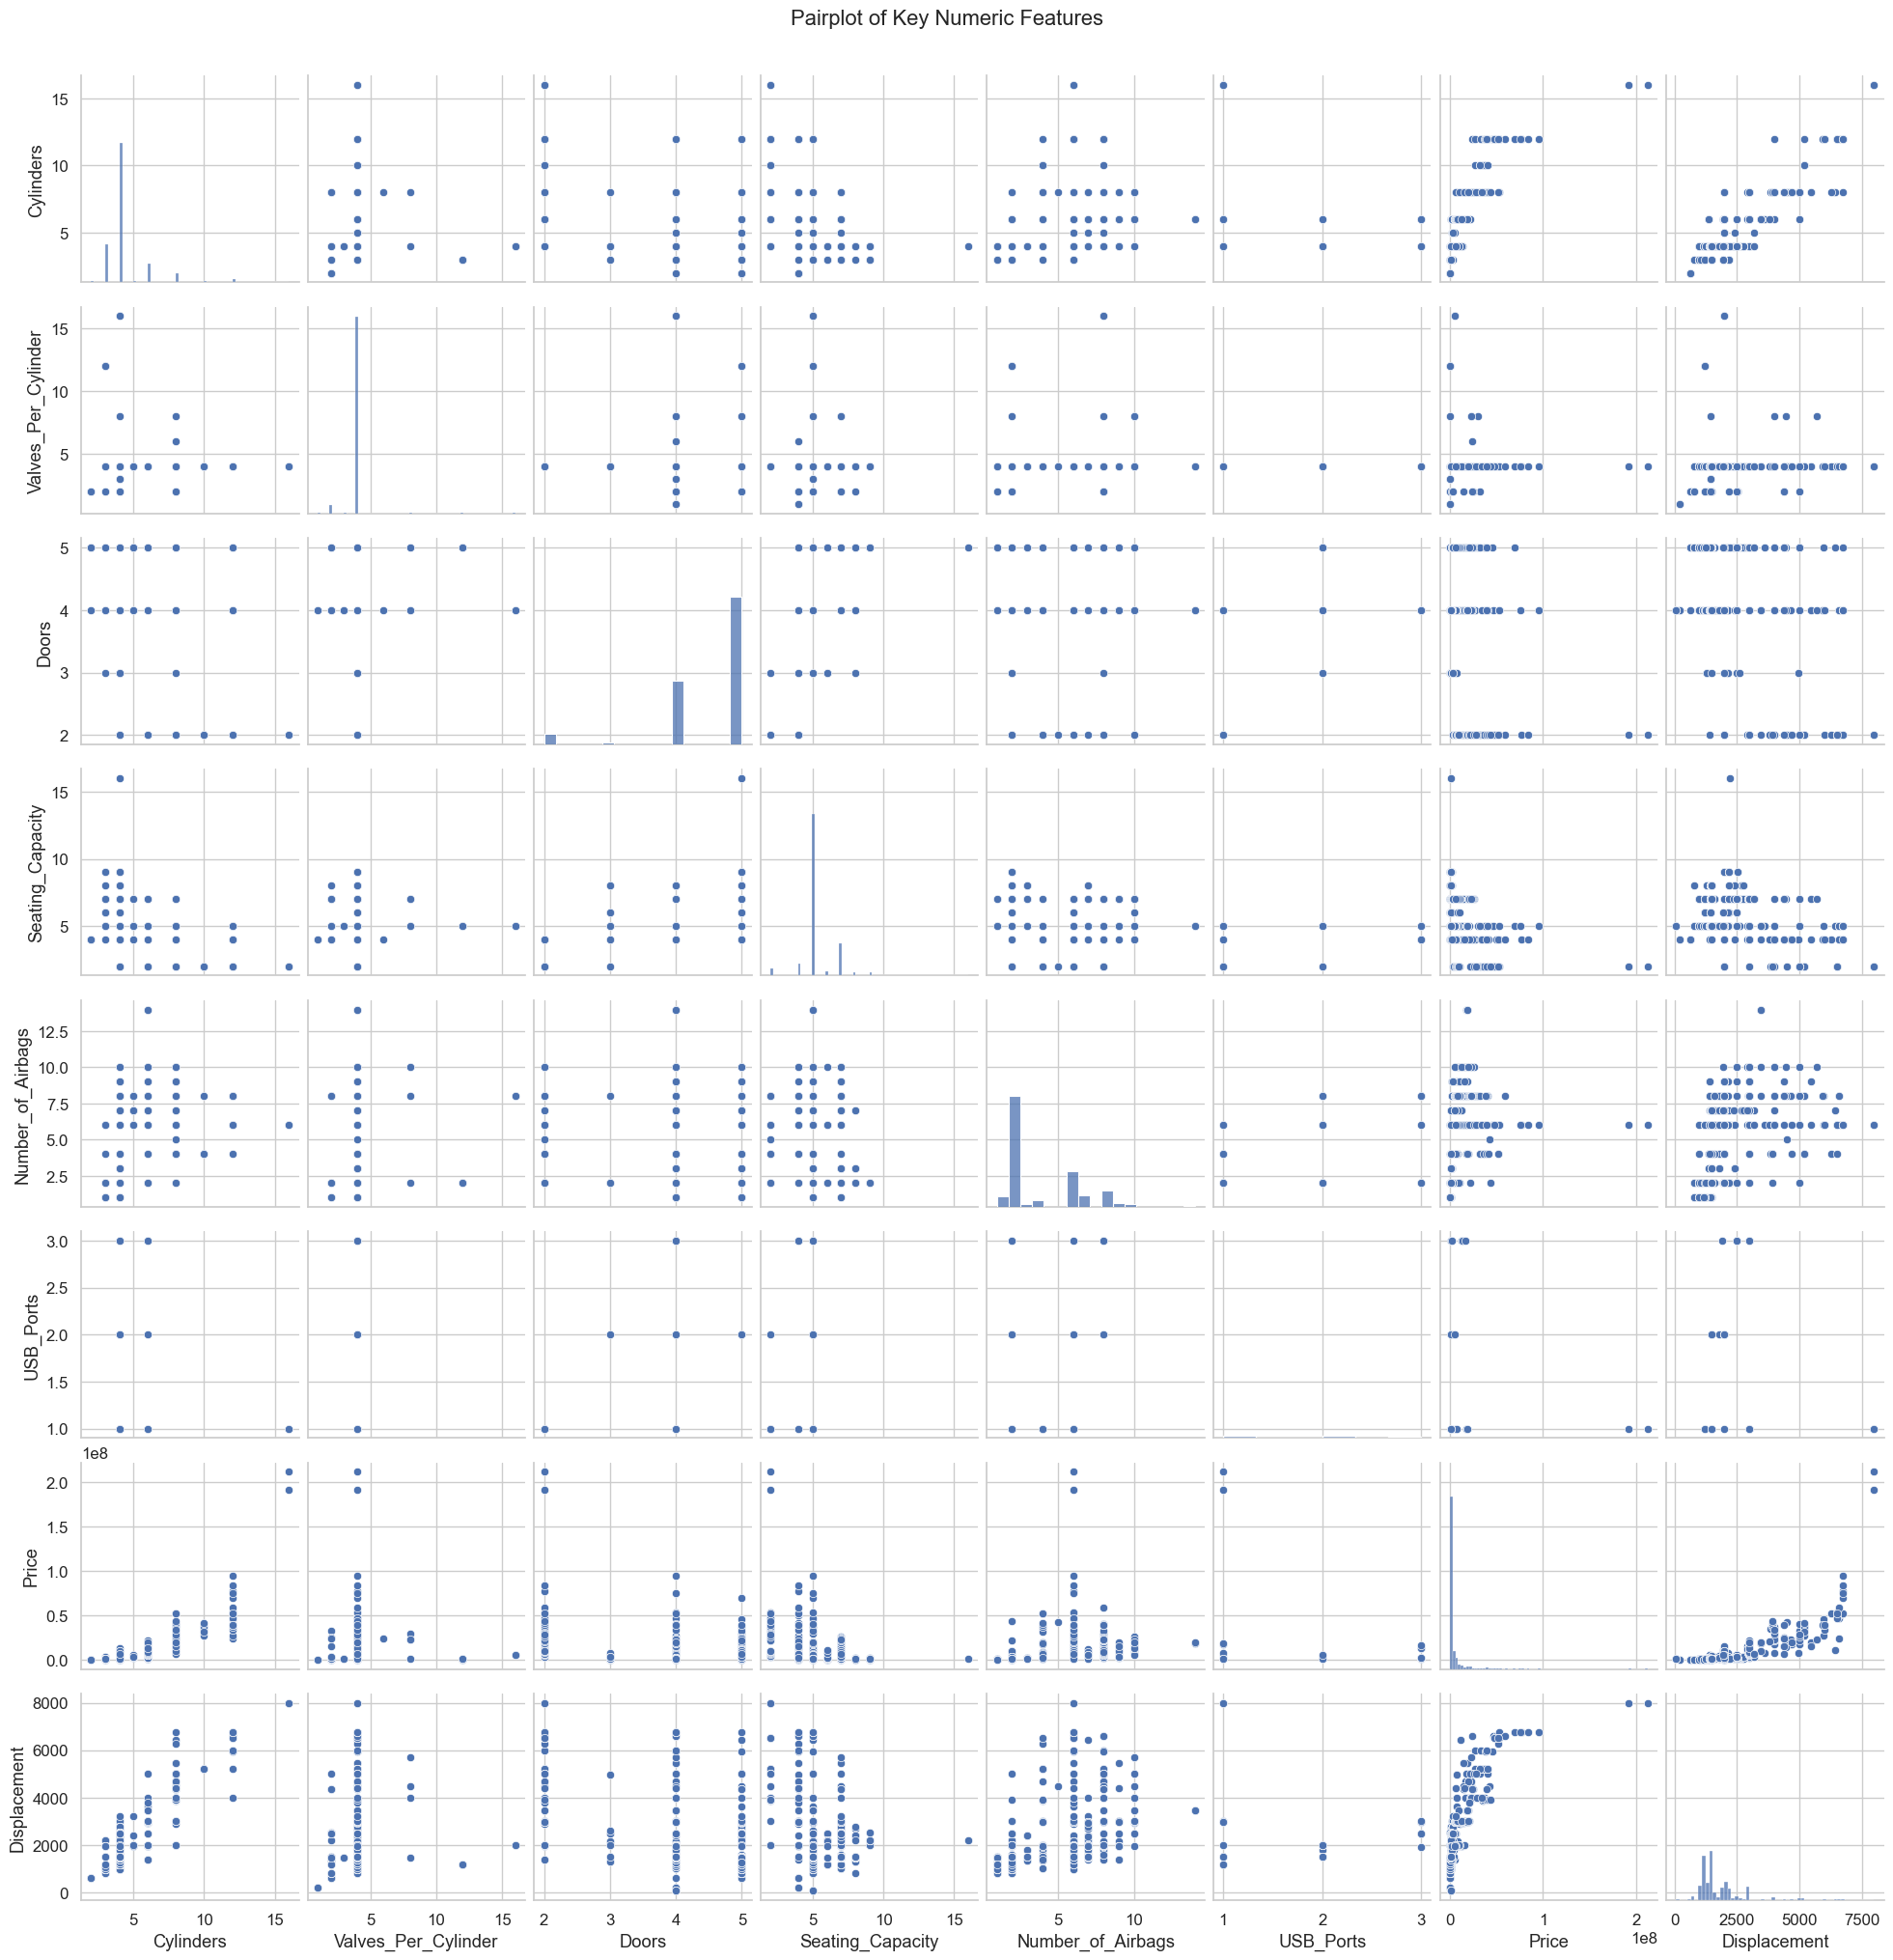

In [13]:
# 8. Pairplot: Numeric relationships
sns.pairplot(cars[numeric_cols])
plt.suptitle('Pairplot of Key Numeric Features', y=1.02)
plt.show()

#### Corelation Heatmap

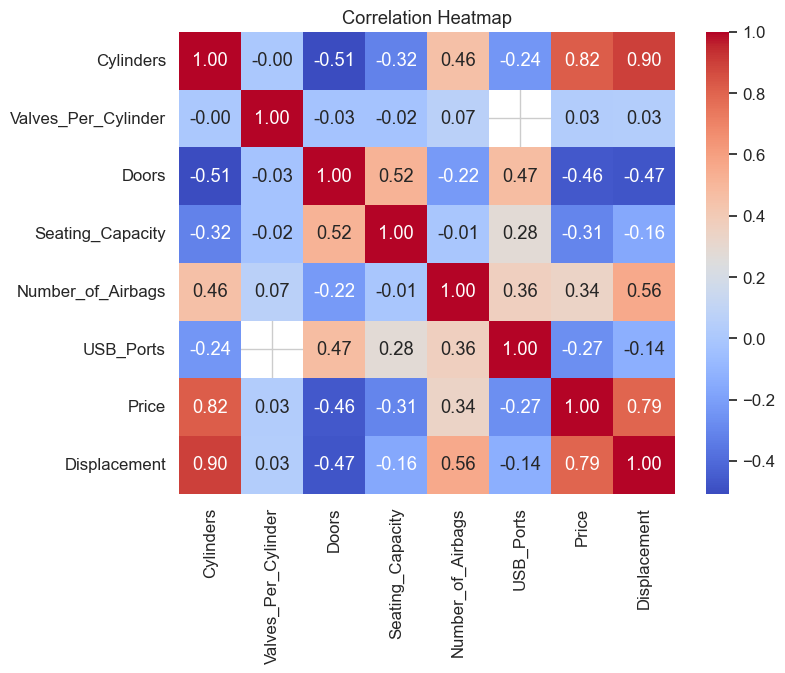

In [14]:
# 9. Correlation Heatmap
plt.figure(figsize=(8,6))
corr = cars[numeric_cols].corr()
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap')
plt.show()

#### QQ Plot

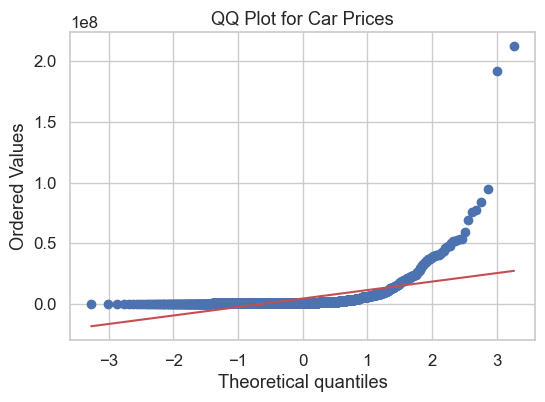

In [15]:
# 10. QQ Plot: Price normality check
plt.figure(figsize=(6,4))
stats.probplot(cars['Price'], dist="norm", plot=plt)
plt.title('QQ Plot for Car Prices')
plt.show()

#### Matrix Of Charts using SubPlots

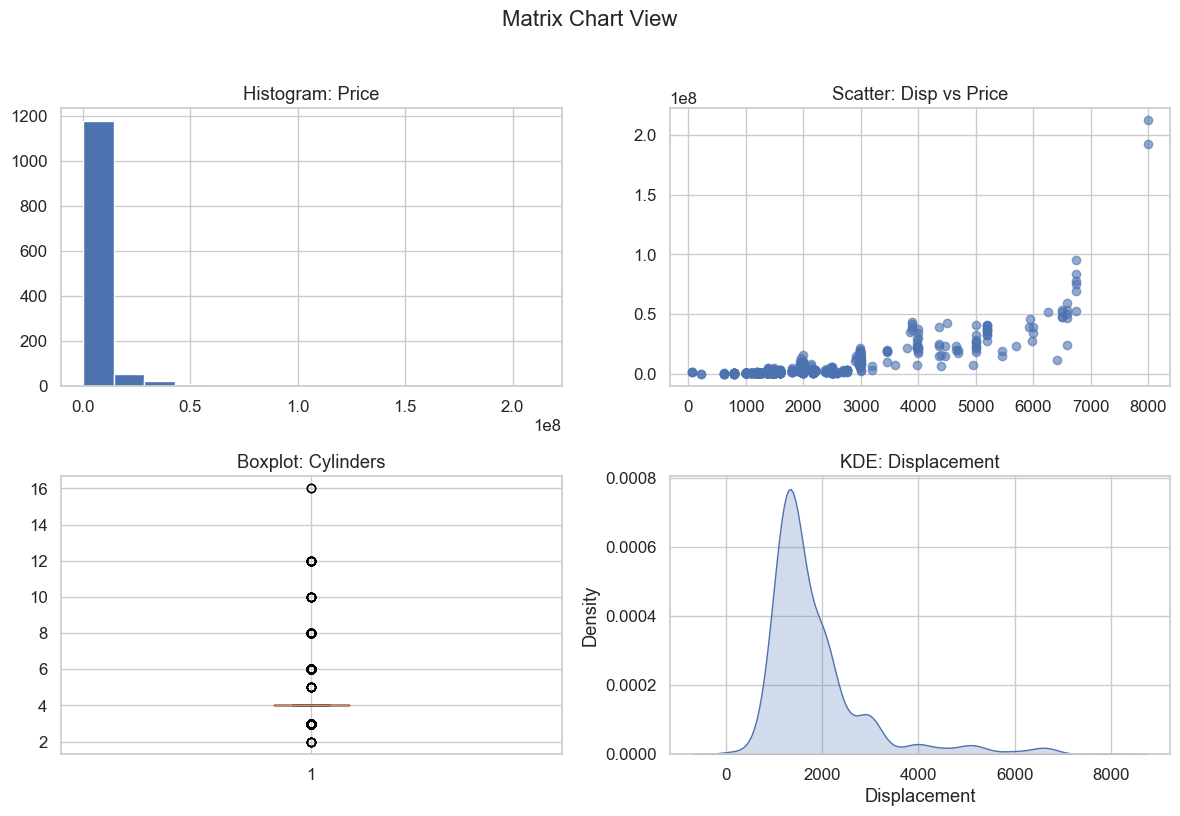

In [16]:
# 11. Matrix of Charts (2x2 Subplots)
fig, axes = plt.subplots(2,2, figsize=(12,8))

axes[0,0].hist(cars['Price'], bins=15)
axes[0,0].set_title('Histogram: Price')

axes[0,1].scatter(cars['Displacement'], cars['Price'], alpha=0.6)
axes[0,1].set_title('Scatter: Disp vs Price')

axes[1,0].boxplot(cars['Cylinders'].dropna())
axes[1,0].set_title('Boxplot: Cylinders')

sns.kdeplot(cars['Displacement'], fill=True, ax=axes[1,1])
axes[1,1].set_title('KDE: Displacement')

plt.suptitle('Matrix Chart View', fontsize=16, y=1.02)
plt.tight_layout()
plt.show()

#### Seaborn FacetGrid View 

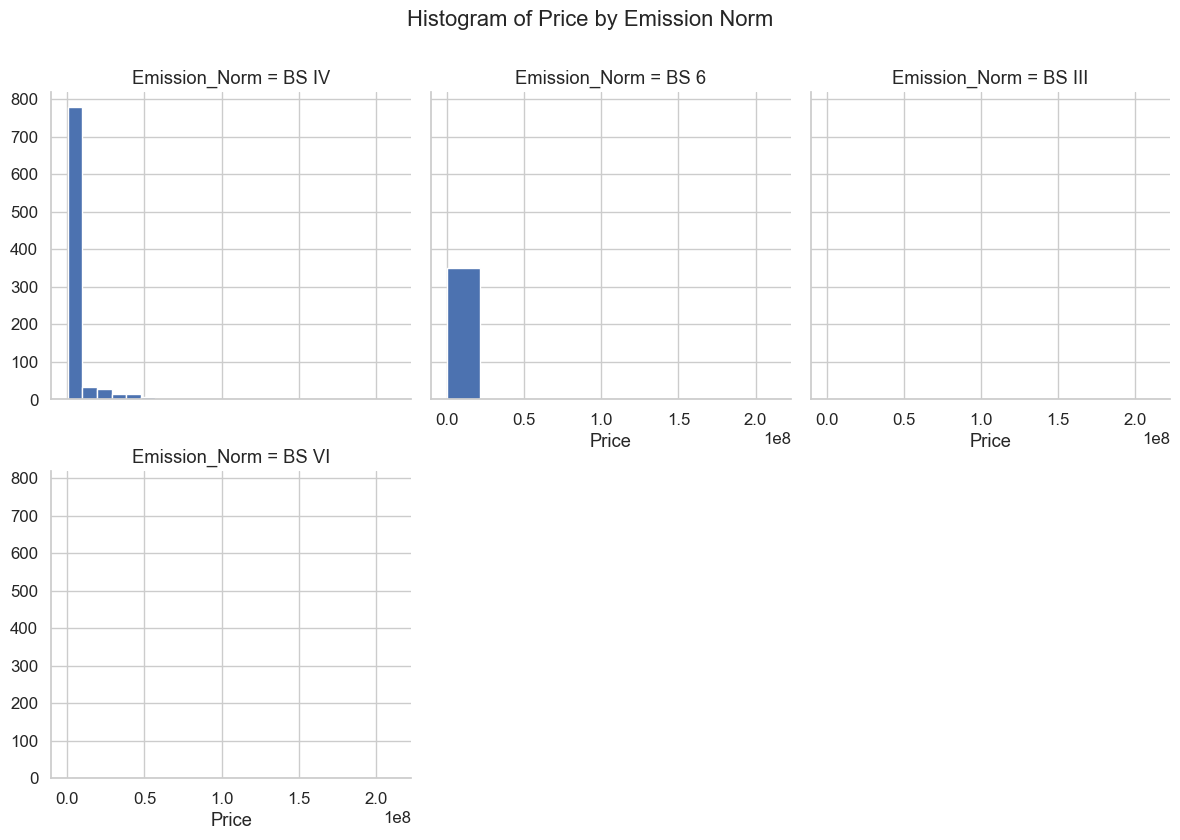

In [17]:
# 12. FacetGrid: Price distrib. by Emission Norm
facet = sns.FacetGrid(cars, col='Emission_Norm', col_wrap=3, height=4)
facet.map(plt.hist, 'Price', bins=10)
facet.fig.suptitle('Histogram of Price by Emission Norm', y=1.05)
plt.show()

#### Exploratory Data Analysis (EDA) 


--- EDA Summary Statistics ---


,count,mean,std,min,25%,50%,75%,max
Cylinders,1210.0,4.380992e+00,1.660957e+00,2.0,4.0,4.0,4.00,16.0
Valves_Per_Cylinder,1174.0,3.977853e+00,8.337633e-01,1.0,4.0,4.0,4.00,16.0
Doors,1272.0,4.550314e+00,7.478161e-01,2.0,4.0,5.0,5.00,5.0
Seating_Capacity,1270.0,5.270079e+00,1.145231e+00,2.0,5.0,5.0,5.00,16.0
Number_of_Airbags,1141.0,3.787029e+00,2.522399e+00,1.0,2.0,2.0,6.00,14.0
USB_Ports,29.0,1.793103e+00,7.736421e-01,1.0,1.0,2.0,2.00,3.0
Price,1276.0,4.596538e+06,1.214735e+07,236447.0,743876.0,1060064.5,2979827.75,212155397.0
Displacement,1264.0,1.858805e+03,1.063152e+03,72.0,1198.0,1497.0,1998.00,7993.0



--- Missing Values by Column ---


Cylinders                   66
Valves_Per_Cylinder        102
Doors                        4
Seating_Capacity             6
Number_of_Airbags          135
USB_Ports                 1247
Price                        0
Displacement                12
Drivetrain                   7
Emission_Norm               11
Cylinder_Configuration      13
dtype: int64

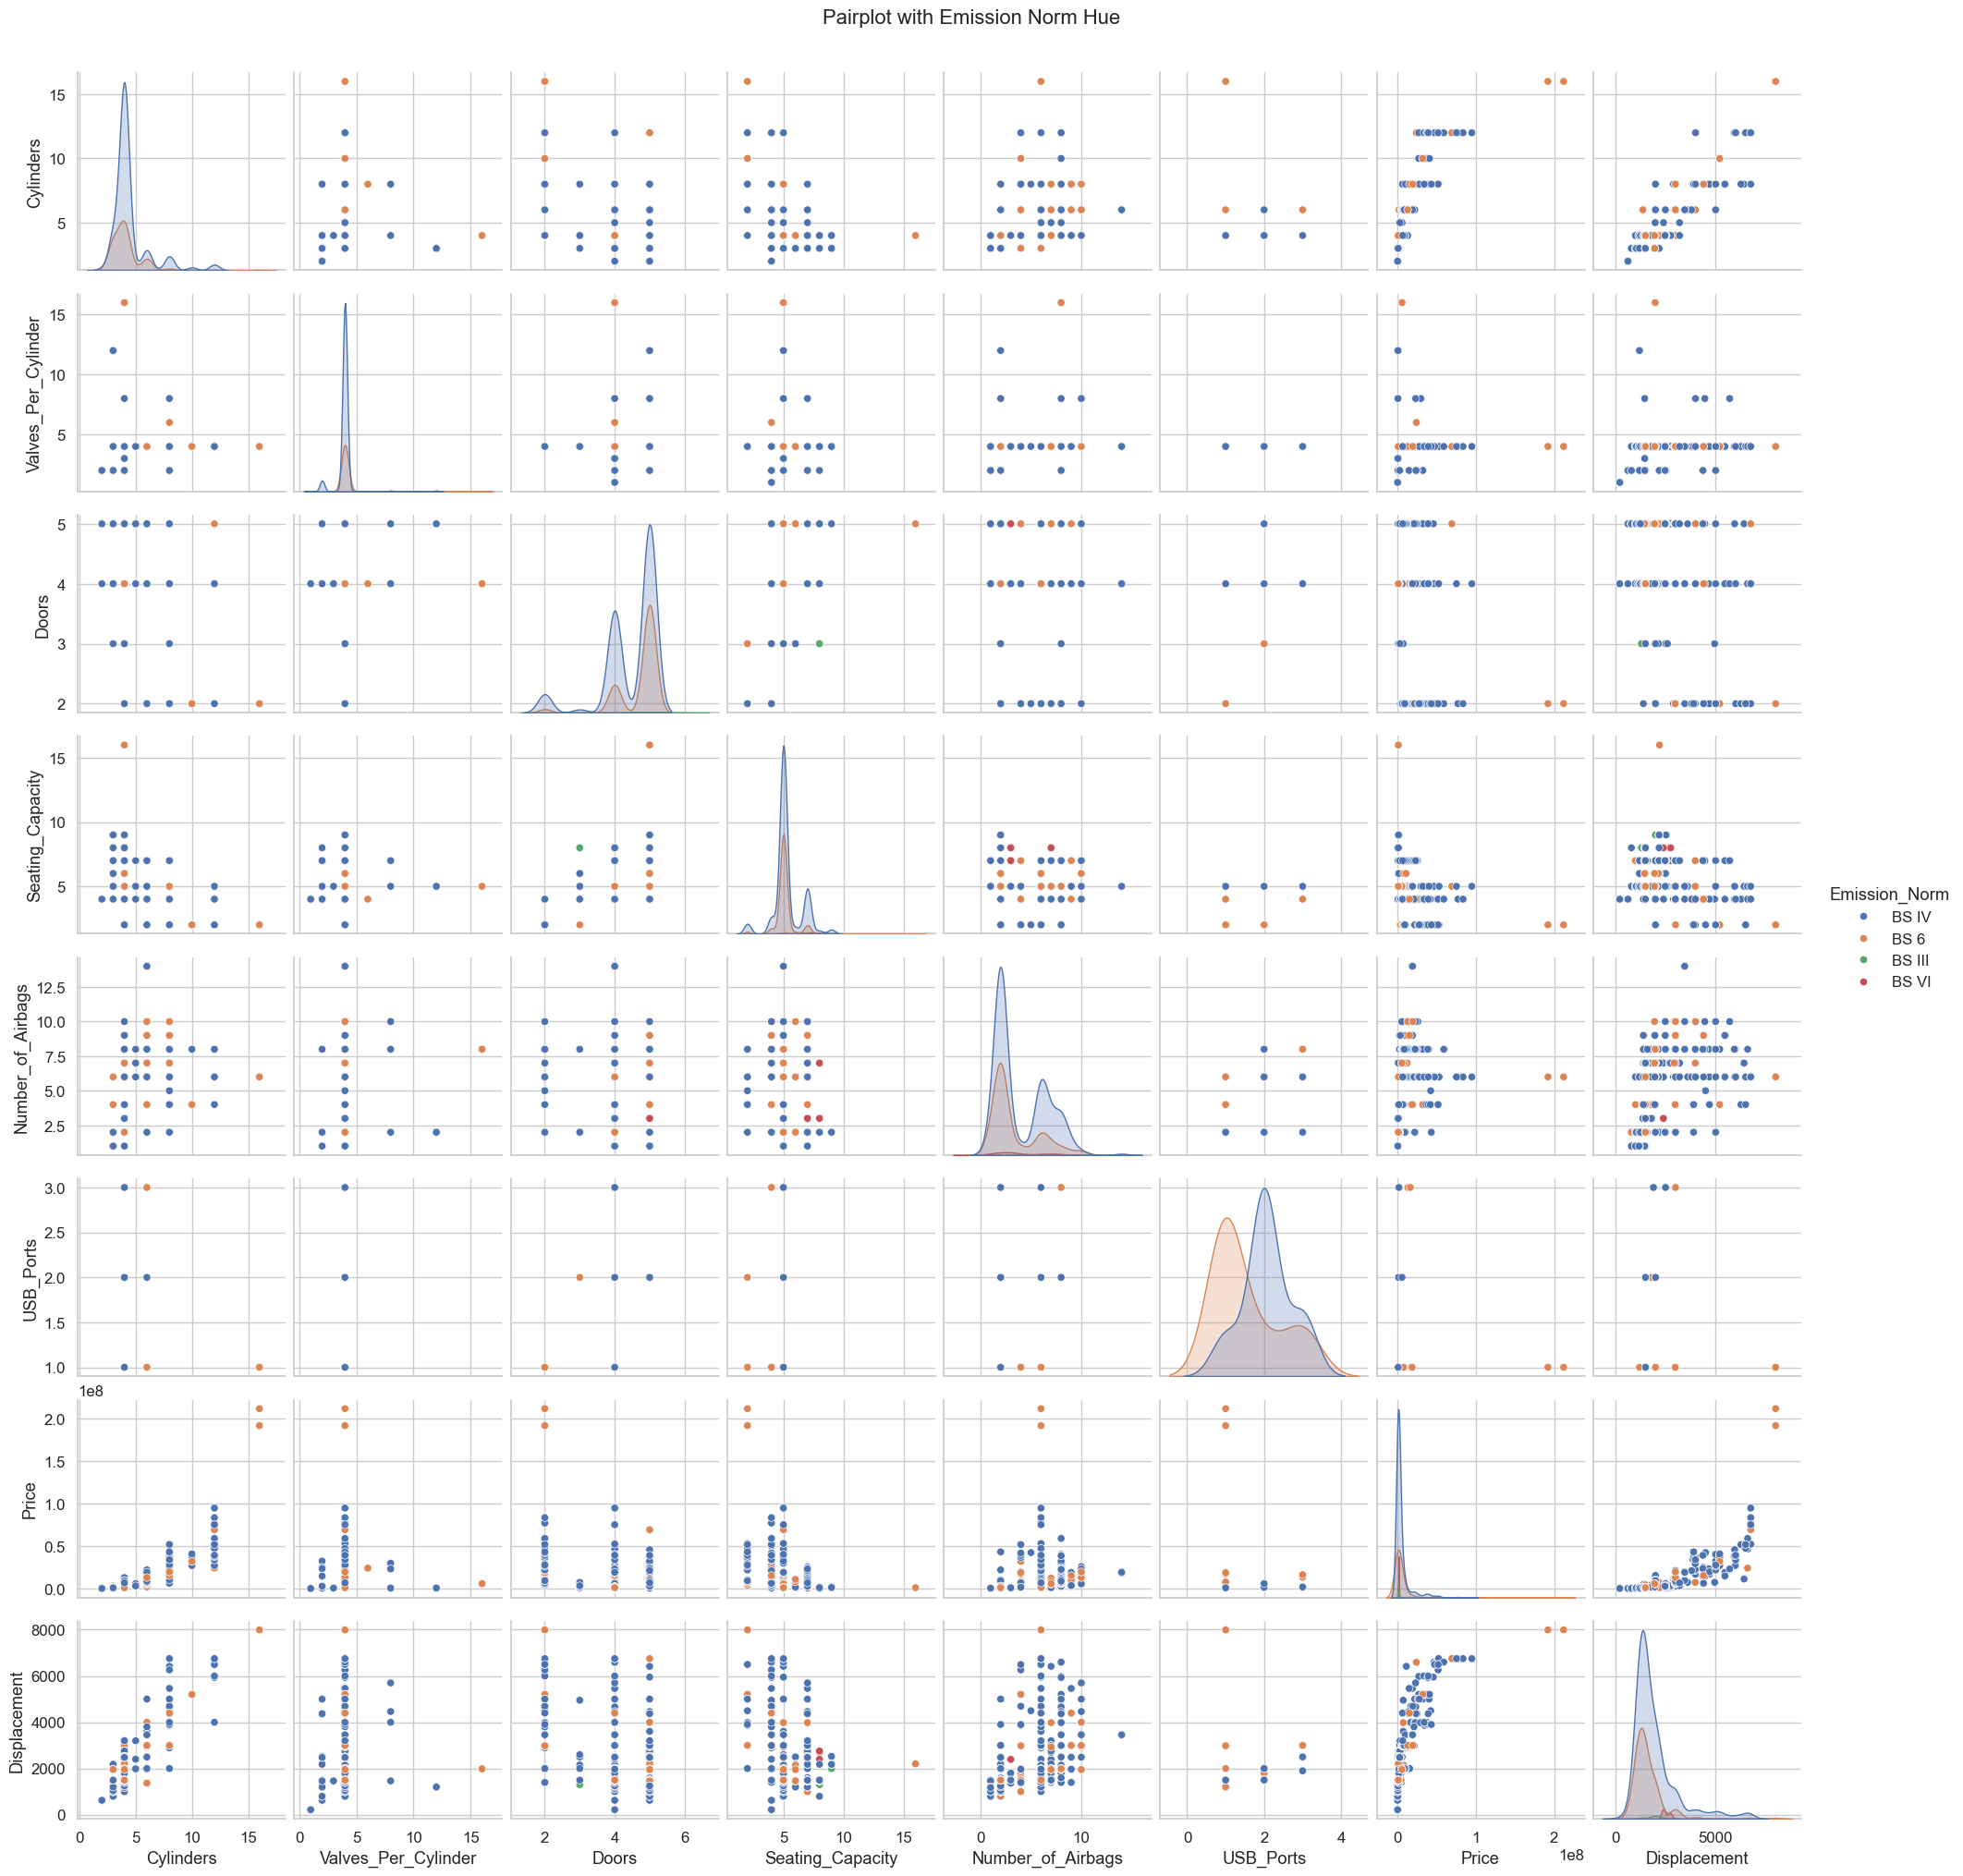

In [18]:
print("\n--- EDA Summary Statistics ---")
display(cars[numeric_cols].describe().T)

print("\n--- Missing Values by Column ---")
display(cars[numeric_cols + categorical_cols].isnull().sum())

# Pairplot with Hue (if categories ≤ 4):
if cars['Emission_Norm'].nunique() <= 4:
    sns.pairplot(cars[numeric_cols + ['Emission_Norm']], hue='Emission_Norm')
    plt.suptitle('Pairplot with Emission Norm Hue', y=1.02)
    plt.show()